         Date Supplier Name         Region  Supplier Lead Time (days)  \
0  01-01-2024    Supplier C         Europe                         40   
1  02-01-2024    Supplier D         Europe                         14   
2  03-01-2024    Supplier B           Asia                         18   
3  04-01-2024    Supplier A           Asia                         22   
4  05-01-2024    Supplier D  South America                         13   

   Inventory Levels (units)  Demand Forecast (units)  Order Quantity (units)  \
0                      1500                      325                     294   
1                       569                      365                     294   
2                       363                      562                     766   
3                       546                      541                     192   
4                       558                      446                     771   

   Backorders (units)  Excess Inventory  Stockout  Long Lead Time  \
0          

<ipython-input-1-142f1b50f81b>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["Supplier Name"], y=df["Order Quantity (units)"], estimator=sum, palette="viridis")


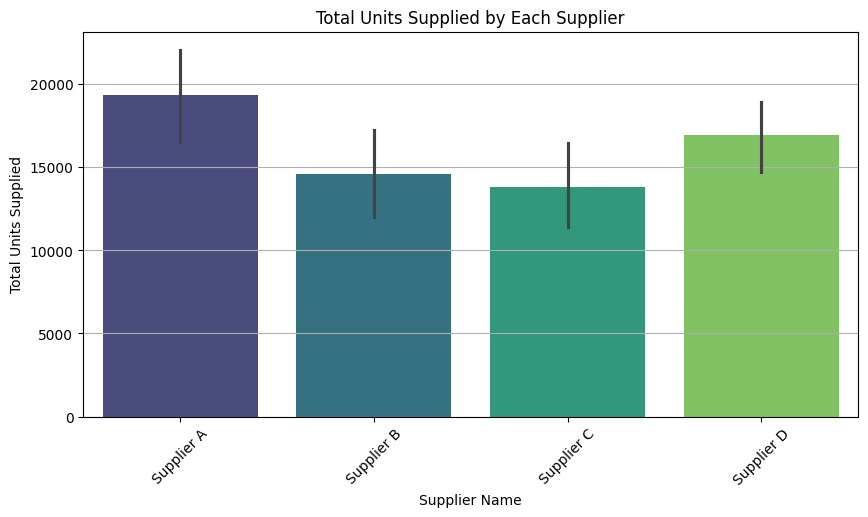

<ipython-input-1-142f1b50f81b>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["Region"], y=df["Order Quantity (units)"], estimator=sum, palette="coolwarm")


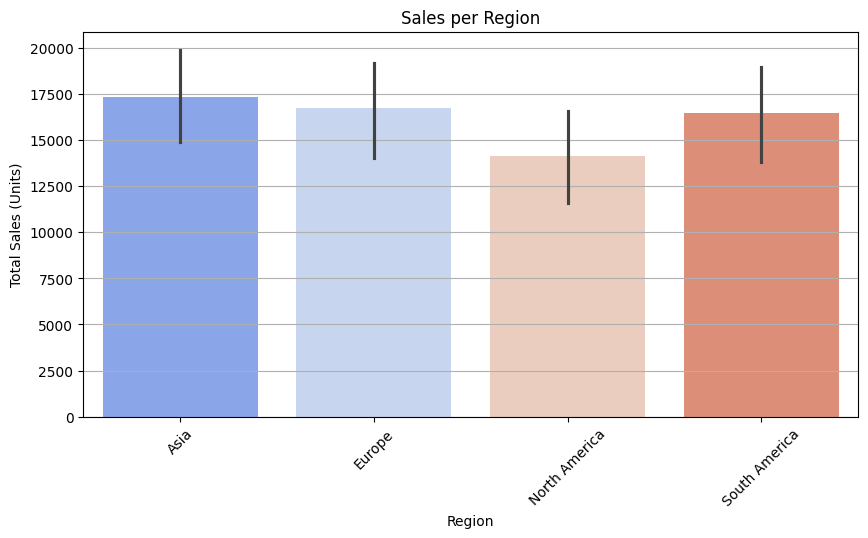

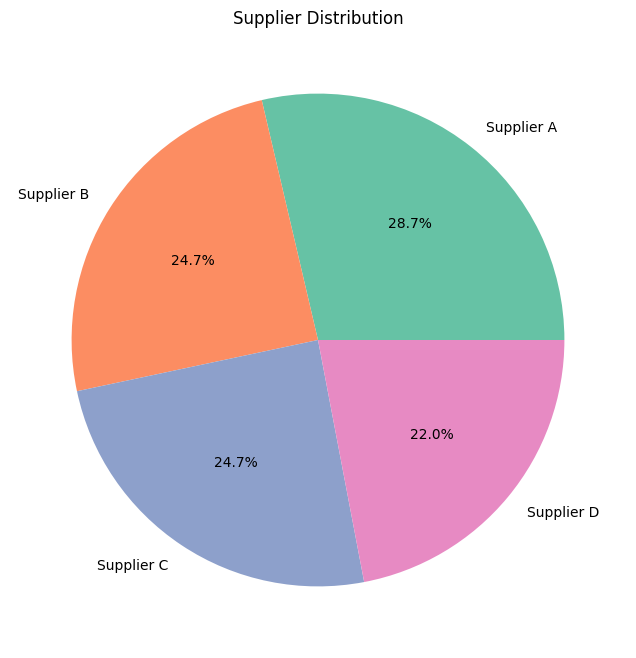

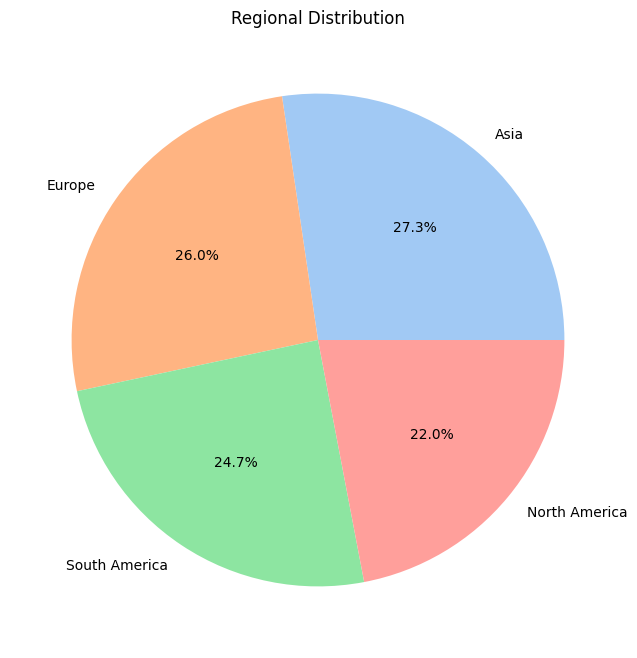

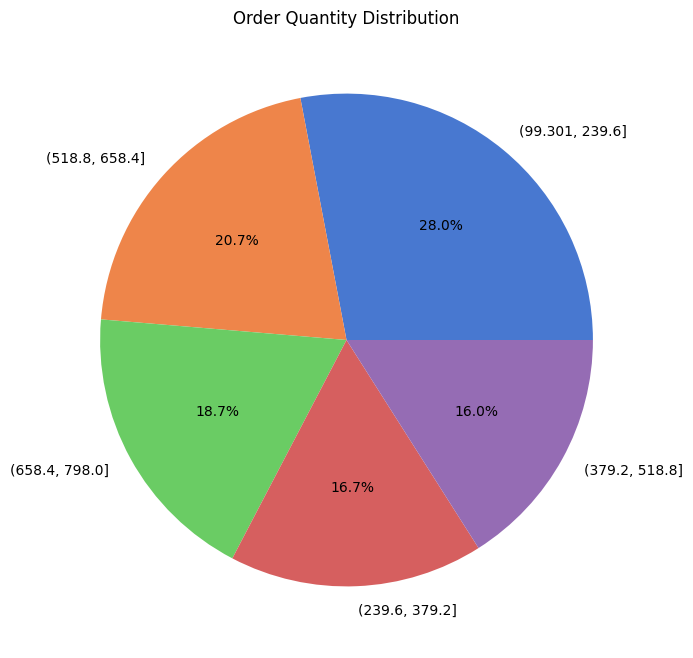

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_excel("/content/Detailed Excel File.xlsx", parse_dates=["Date"])

# Data Cleaning
df.dropna(inplace=True)  # Remove missing values
df = df[df["Inventory Levels (units)"] > 0]  # Ensure valid inventory values
df = df[df["Demand Forecast (units)"] > 0]  # Ensure valid demand values

# Convert categorical columns to appropriate types
df["Supplier Name"] = df["Supplier Name"].astype("category")
df["Region"] = df["Region"].astype("category")

# Save the cleaned dataset
df.to_csv("cleaned_supply_chain_dataset.csv", index=False)

# Display first few rows of cleaned data
print(df.head())

# Bar chart: Total units supplied by each supplier
plt.figure(figsize=(10, 5))
sns.barplot(x=df["Supplier Name"], y=df["Order Quantity (units)"], estimator=sum, palette="viridis")
plt.title("Total Units Supplied by Each Supplier")
plt.xlabel("Supplier Name")
plt.ylabel("Total Units Supplied")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

# Bar chart: Sales per region
plt.figure(figsize=(10, 5))
sns.barplot(x=df["Region"], y=df["Order Quantity (units)"], estimator=sum, palette="coolwarm")
plt.title("Sales per Region")
plt.xlabel("Region")
plt.ylabel("Total Sales (Units)")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

# Pie chart: Distribution of Suppliers
plt.figure(figsize=(8, 8))
df["Supplier Name"].value_counts().plot.pie(autopct="%1.1f%%", colors=sns.color_palette("Set2"))
plt.title("Supplier Distribution")
plt.ylabel("")
plt.show()

# Pie chart: Distribution of Regions
plt.figure(figsize=(8, 8))
df["Region"].value_counts().plot.pie(autopct="%1.1f%%", colors=sns.color_palette("pastel"))
plt.title("Regional Distribution")
plt.ylabel("")
plt.show()

# Pie chart: Distribution of Order Quantities
plt.figure(figsize=(8, 8))
df["Order Quantity (units)"].value_counts(bins=5).plot.pie(autopct="%1.1f%%", colors=sns.color_palette("muted"))
plt.title("Order Quantity Distribution")
plt.ylabel("")
plt.show()
